<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/19_Exercise_Skill_Pay_Analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Investigate High Paying Skills

## Topics Covered

This exercise goes over:

* Plotting 
* Customization

## Question

In our project we want to analyze salary data. Here's what we'll be focusing on: 
* Visualize for highest paying skills
* Visualize for highest demanded skills

Load the data.

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Loading the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

<bound method NDFrame.head of              job_title_short  \
0       Senior Data Engineer   
1               Data Analyst   
2              Data Engineer   
3              Data Engineer   
4              Data Engineer   
...                      ...   
785736     Software Engineer   
785737          Data Analyst   
785738      Business Analyst   
785739         Data Engineer   
785740     Software Engineer   

                                                job_title  \
0       Senior Clinical Data Engineer / Principal Clin...   
1                                            Data Analyst   
2       Data Engineer/Scientist/Analyst, Mid or Senior...   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   
4                                  Data Engineer- Sr Jobs   
...                                                   ...   
785736                                    DevOps Engineer   
785737                                   CRM Data Analyst   
785738                     Commercia

In [9]:
#Only get data analyst jobs in ARG
df_DA_ARG = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Argentina')].copy()

#Drop Nan values of ['salary_year_avg']
df_DA_ARG = df_DA_ARG.dropna(subset=['salary_year_avg'])

df_DA_ARG.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
93501,Data Analyst,"Data Analyst, Sales",Argentina,via Ai-Jobs.net,Full-time,False,Argentina,2023-01-04 09:57:50,True,False,Argentina,year,111202.0,NaN,Dialpad,"[sql, python, flow]","{'other': ['flow'], 'programming': ['sql', 'py..."
345103,Data Analyst,Pasantia - Data Analyst BI,Argentina,via Ai-Jobs.net,Part-time,False,Argentina,2023-01-10 23:44:52,False,False,Argentina,year,45000.0,NaN,Publicis Groupe,"[sql, python, javascript, sql server, excel, p...","{'analyst_tools': ['excel', 'power bi', 'table..."
548036,Data Analyst,Data Analyst,"Veinticinco de Mayo, Buenos Aires Province, Ar...",via Ai-Jobs.net,Full-time,False,Argentina,2023-12-30 19:08:55,False,False,Argentina,year,74368.5,NaN,Cargill,None,None
559523,Data Analyst,Data Analyst,"Buenos Aires, Argentina",via Ai-Jobs.net,Full-time,False,Argentina,2023-05-06 04:45:18,True,False,Argentina,year,111175.0,NaN,Publicis Groupe,"[sql, python]","{'programming': ['sql', 'python']}"


In [7]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

KeyboardInterrupt: 

In [10]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

### Visualize for highest paying skills

1. Explode out the skills column.

In [13]:
df_DA_ARG = df_DA_ARG.explode('job_skills')

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


2. Get the highest paying skills (order by highest to lowest).

In [37]:
df_DA_top_ARG = df_DA_ARG.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('median', ascending=False)
df_DA_top_ARG

,count,median
job_skills,,
flow,1,111202.0
python,3,111175.0
sql,3,111175.0
excel,1,45000.0
javascript,1,45000.0
power bi,1,45000.0
sql server,1,45000.0
tableau,1,45000.0


In [38]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


3. Match up the highest count (demand) of skills and highest median salary by skill for data analyst roles.

In [ ]:
df_DA_skills_ARG = df_DA_ARG.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)
df_DA_skills_ARG

,count,median
job_skills,,
python,3,111175.0
sql,3,111175.0
excel,1,45000.0
flow,1,111202.0
javascript,1,45000.0
power bi,1,45000.0
sql server,1,45000.0
tableau,1,45000.0


In [39]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


### Plot

5. Let's plot these next to each other using `subplots()`.

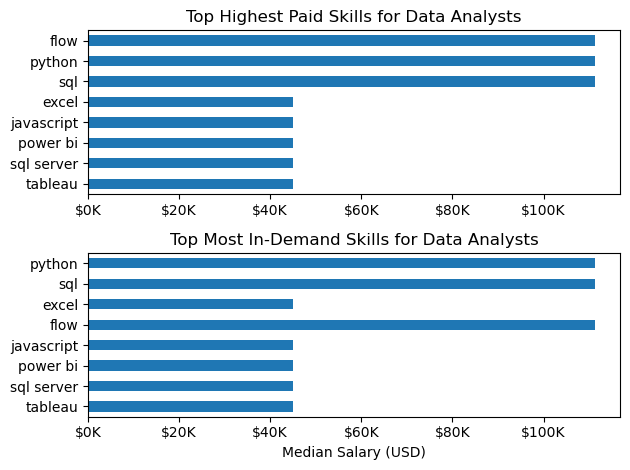

In [46]:
fig, ax = plt.subplots(2, 1)

df_DA_top_ARG.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top Highest Paid Skills for Data Analysts')
ax[0].invert_yaxis()
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DA_skills_ARG.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].invert_yaxis()
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()

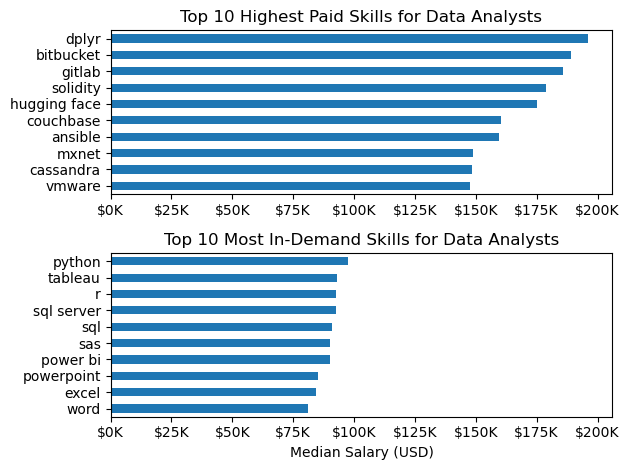

In [36]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()